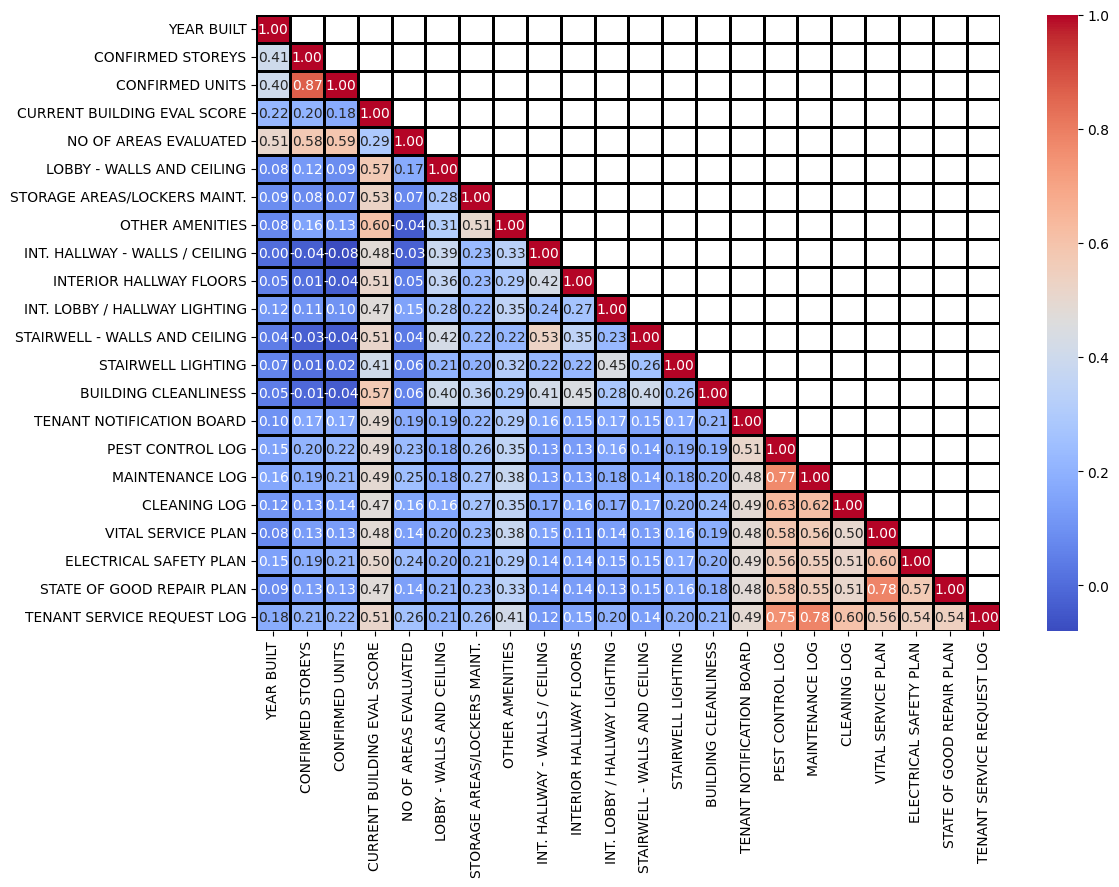

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"../data/Apartment Building Evaluations 2023 - current.csv")  # Adjust file path if needed

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])
df_numeric = df_numeric.drop(columns=['_id', 'RSN', 'LATITUDE', 'LONGITUDE', 'X', 'Y', 'PROACTIVE BUILDING SCORE'], errors='ignore')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Set correlation threshold
threshold = 0.40

# Count the number of strong correlations (excluding self-correlation)
strong_corr_counts = (np.abs(corr_matrix) > threshold).sum() - 1  # Subtract 1 to ignore self-correlation

# Keep only columns with more than one strong correlation
filtered_cols = strong_corr_counts[strong_corr_counts > 1].index
filtered_corr_matrix = corr_matrix.loc[filtered_cols, filtered_cols]


# Check if filtered_corr_matrix is empty before proceeding
if not filtered_corr_matrix.empty:
    # Create mask for upper triangle only (diagonal remains visible)
    mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool), k=1)  # k=1 keeps diagonal

    # Set up the figure
    plt.figure(figsize=(12, 8))

    # Plot the heatmap with a grid
    sns.heatmap(
        filtered_corr_matrix, 
        cmap="coolwarm", 
        annot=True, 
        fmt=".2f", 
        linewidths=1,   # Gridline width
        linecolor="black",  # Grid color
        mask=mask
    )

    # Show the plot
    plt.show()
else:
    print("No columns meet the correlation threshold criteria.")


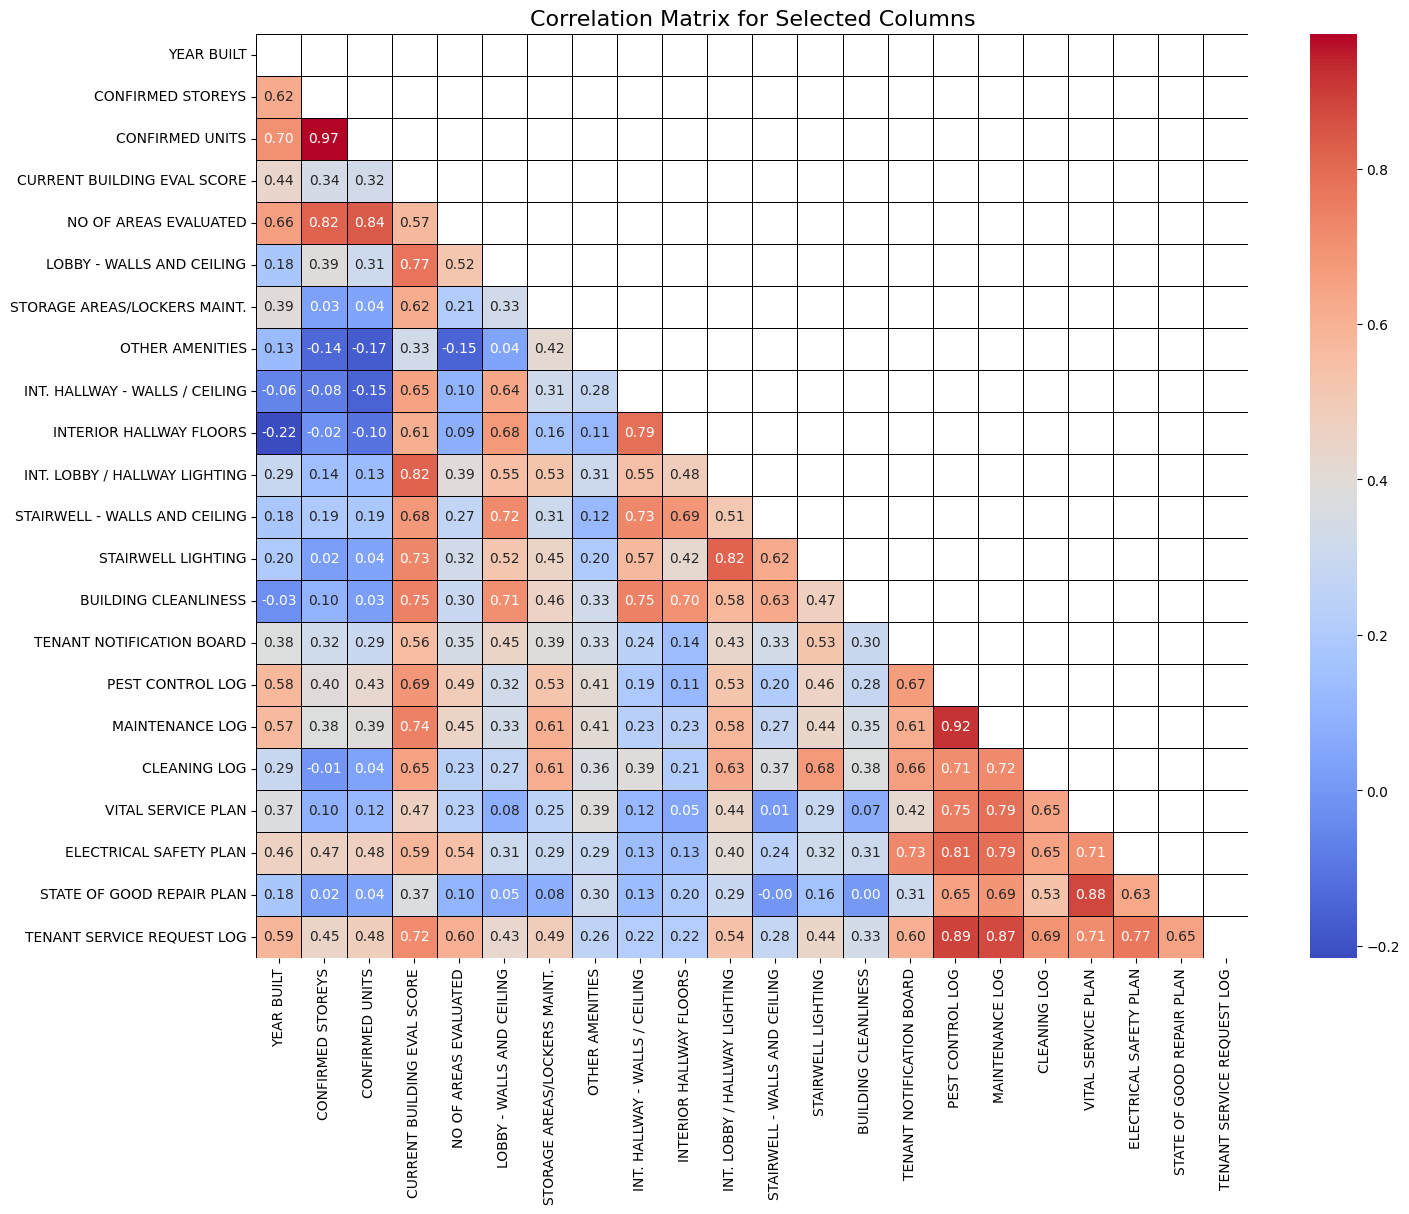

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"../data/Apartment Building Evaluations 2023 - current.csv")  # Adjust file path if needed

# Plot the grouped data for each column in filtered_cols
# Compute the correlation matrix for the entire ward_grouped DataFrame
ward_grouped = df.groupby('WARD')[filtered_cols].mean()
corr_matrix_all = ward_grouped.corr()

# Create a mask for the upper triangle
mask_all = np.triu(np.ones_like(corr_matrix_all, dtype=bool))

# Set up the figure
plt.figure(figsize=(16, 12))

# Plot the heatmap
sns.heatmap(
    corr_matrix_all, 
    mask=mask_all, 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor="black"
)

# Add title
plt.title("Correlation Matrix for Selected Columns", fontsize=16)

# Show the plot
plt.show()





In [5]:
# Calculate correlation between WARD and other numeric columns
ward_correlation = df.groupby('WARD')[df_numeric.columns]

# Display the correlation values
ward_correlation_matrix = ward_correlation.mean().round(2)
ward_correlation_matrix


,YEAR REGISTERED,YEAR BUILT,YEAR EVALUATED,WARD,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,CURRENT REACTIVE SCORE,NO OF AREAS EVALUATED,NUMBERING OF PROPERTY,...,BUILDING CLEANLINESS,COMMON AREA PESTS,TENANT NOTIFICATION BOARD,PEST CONTROL LOG,MAINTENANCE LOG,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG
WARD,,,,,,,,,,,,,,,,,,,,,
1,2017.22,1968.30,2023.54,1.0,9.01,117.10,86.51,-0.44,42.84,2.85,...,2.44,2.88,2.57,2.55,2.55,2.40,2.61,2.13,2.50,2.74
2,2017.28,1965.77,2023.57,2.0,9.22,95.76,88.05,-0.15,42.19,2.82,...,2.74,2.96,2.40,2.68,2.64,2.30,2.74,2.28,2.59,2.72
3,2017.63,1959.87,2023.50,3.0,5.63,55.87,89.38,-0.06,39.70,2.90,...,2.71,2.96,2.42,2.58,2.63,2.47,2.46,2.03,2.52,2.60
4,2017.40,1955.51,2023.50,4.0,7.38,82.98,86.92,-0.10,39.95,2.93,...,2.57,2.92,2.45,2.56,2.42,2.21,2.34,2.02,2.36,2.47
5,2017.45,1963.20,2023.52,5.0,6.95,76.66,85.53,-0.09,40.29,2.92,...,2.58,2.95,2.39,2.36,2.40,2.19,2.25,1.95,2.28,2.44
6,2017.27,1962.18,2023.51,6.0,6.22,66.46,86.54,-0.07,40.37,2.84,...,2.62,2.88,2.66,2.69,2.68,2.62,2.62,2.38,2.66,2.66
7,2017.09,1970.50,2023.49,7.0,10.86,144.57,86.80,-0.08,43.12,2.99,...,2.50,2.89,2.56,2.65,2.52,2.44,2.44,2.26,2.47,2.89
8,2017.23,1960.25,2023.49,8.0,5.69,59.91,86.05,-0.09,40.50,2.88,...,2.65,2.98,2.55,2.41,2.41,2.48,2.48,2.18,2.38,2.50
9,2017.55,1957.30,2023.46,9.0,5.85,68.02,78.84,-0.17,38.13,2.71,...,2.35,2.81,2.33,2.37,2.30,2.22,2.27,2.02,2.18,2.39


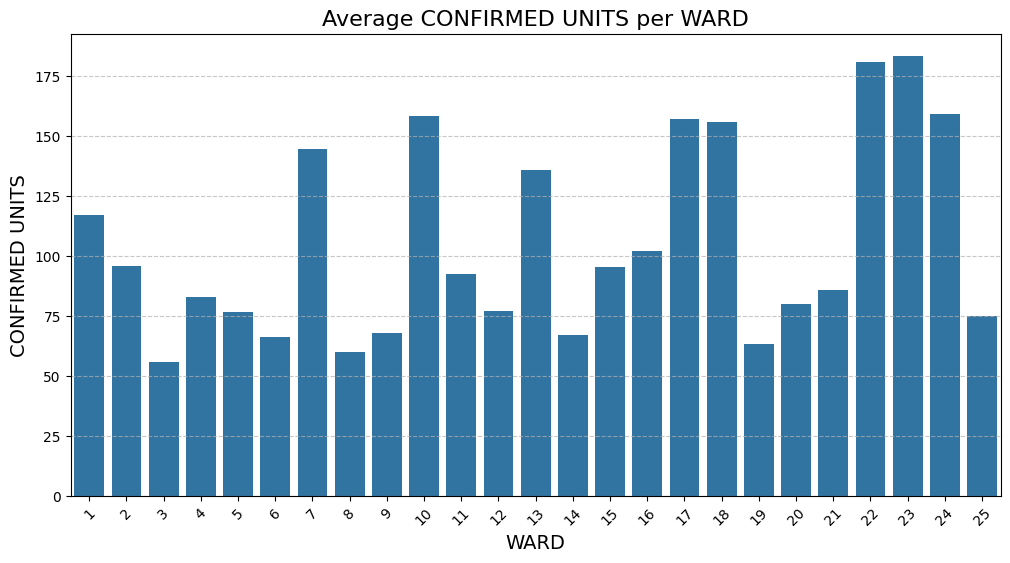

In [6]:
# Bar graph for "CONFIRMED UNITS" per "WARD"
plt.figure(figsize=(12, 6))
sns.barplot(data=ward_grouped.reset_index(), x='WARD', y='CONFIRMED UNITS')

# Add labels and title
plt.title('Average CONFIRMED UNITS per WARD', fontsize=16)
plt.xlabel('WARD', fontsize=14)
plt.ylabel('CONFIRMED UNITS', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()